In [1]:
import numpy as np
import scipy
from scipy.stats import norm
import random
import QuantLib as ql
import matplotlib.pyplot as plt

In [2]:
#geo forward path with drift
def get_geo_drift_path(T,sigma, f0,steps):
    dt= T/steps
    t = np.linspace(0,T,steps)
    mu = (sigma**2*0.5*f0)/(1+0.5*f0)
    Bt = [0]+ np.random.standard_normal(size=steps)
    Bt = np.cumsum(Bt)*np.sqrt(dt)
    path = f0*np.exp(mu*T-(0.5*sigma**2)*t+sigma*Bt)
    plt.plot(t,path)
    return path

0.00109515978581362


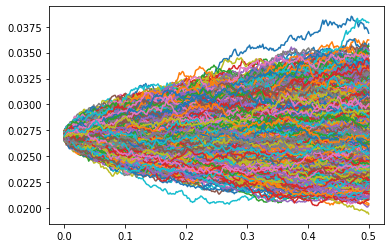

In [3]:
#libor in arrears monte carlo
f_path=[]
f_final=[]
payoff=[]
P1=1/(1+(0.5*0.027))
for n in range(0,10000):
    f_path = get_geo_drift_path(.5,0.12,0.027,300)
    f_final.append(f_path[-1])
    
for i in range(0,len(f_final)):
    fk=f_final[i]-0.025
    if fk>0:
        payoff.append(fk)
    else:
        payoff.append(0)
    
    
mc_price = 0.5*P1*np.mean(payoff)
print(mc_price)


In [4]:
#black formula libor in arrears cap
f=0.027
K=0.025
sigma=0.12
T1=1
T2=1.5
tau=T2-T1
P1=1/(1+(0.5*0.027))

d1 = (np.log(f/K)+(0.5*sigma**2)*tau) / (sigma*np.sqrt(tau))
d2 = d1-sigma*np.sqrt(tau)

nd1=norm.cdf(d1)
nd2=norm.cdf(d2)
Q = (f*norm.cdf(d1) - K*norm.cdf(d2))
cap=Q*P1*0.5
print( cap)

0.0010944547583434678


In [42]:
#Improvement -> calculate the individual drifts between each step
#and use to evolve to next step 

T1=1
T2=1.5
tau=T2-T1
sigma=0.12
f=0.027
steps=100
dt=float(tau/steps)


mu = (0.12**2*dt*f)/(1+dt*f)

f_path=[0.027]
mu_list=[mu]
f_final=[]
payoff=[]
P1=1/(1+(0.5*0.027))


#compute drift between each step
#and evolve to next forward repeat process for number of steps, and n paths
for n in range(0,1000):
    for i in range(0,steps):
        Bt = [0]+ np.random.standard_normal(size=1)
        sqrtBt = np.cumsum(Bt)*np.sqrt(dt)
        f = f*np.exp(mu*dt-(0.5*sigma**2)*dt+sigma*sqrtBt)
        f_path.append(f)
        mu = (sigma**2*dt*f)/(1+dt*f)
        mu_list.append(mu)
    
    f_final.append(f)

#payoffs

for j in range(0,len(f_final)):
    fk=f_final[j]-0.025
    if fk>0:
        payoff.append(fk)
    else:
        payoff.append(0)
    
#monte carlo payoffs  
mc_price = 0.5*P1*np.mean(payoff)
print(mc_price)

[0.00969188]


In [ ]:
#github link
https://github.com/Soph42/Joshi-Projects/tree/main/homework